In [104]:
#pip install captcha

## Generate Dataset for Testing

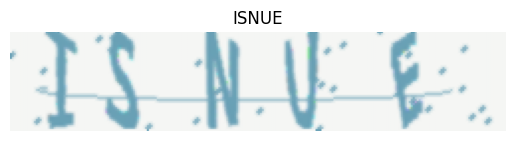

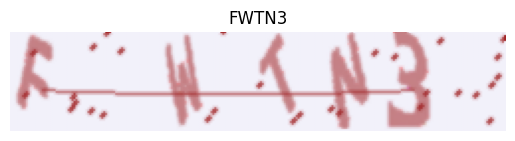

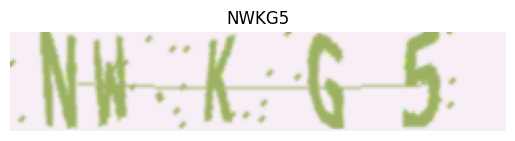

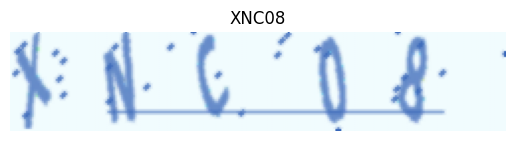

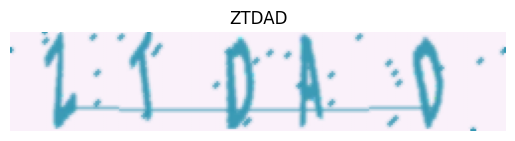

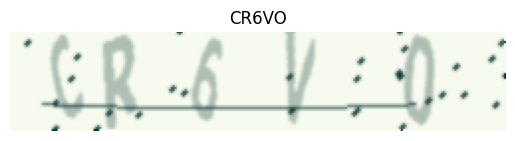

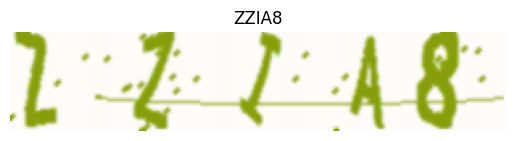

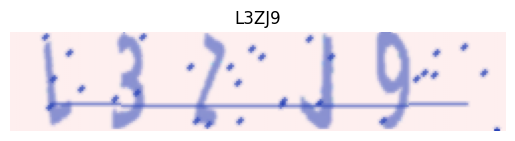

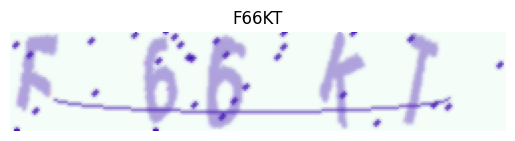

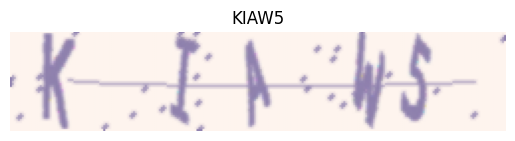

In [101]:
import os
import shutil
import string
import random
import matplotlib.pyplot as plt
from captcha.image import ImageCaptcha

def generate_random_string(length):
    characters = string.ascii_uppercase + string.digits
    return ' '.join(random.choice(characters) for _ in range(length))

string_length = 5
samples = 10
image_width = 250
image_height = 50
output_dir = 'captcha_phrases'

if os.path.exists(output_dir):
    shutil.rmtree(output_dir)

os.makedirs(output_dir, exist_ok=True)

for sample in range(samples):
    # Generate a CAPTCHA of a single value (A-Z, 0-9)
    captcha_text = generate_random_string(string_length)
    captcha = ImageCaptcha(width=image_width, height=image_height, font_sizes=(40,))
    captcha_image = captcha.generate_image(captcha_text)
    captcha_text = captcha_text.replace(' ', '')

    # Convert CAPTCHA to black & white
    #captcha_image = captcha_image.convert('L')

    # Save CAPTCHA as PNG
    filename = os.path.join(output_dir, f'{captcha_text}.png')
    captcha_image.save(filename)

# Plot
num_images = 10
png_files = [file for file in os.listdir(output_dir) if file.endswith('.png')]
random_png_files = random.sample(png_files, num_images)

for png_file in random_png_files:
    image_path = os.path.join(output_dir, png_file)
    image = plt.imread(image_path)
    
    plt.imshow(image, cmap='gray')
    plt.title(png_file[:-4])
    plt.axis('off')
    plt.show()

## Generate Dataset for Training

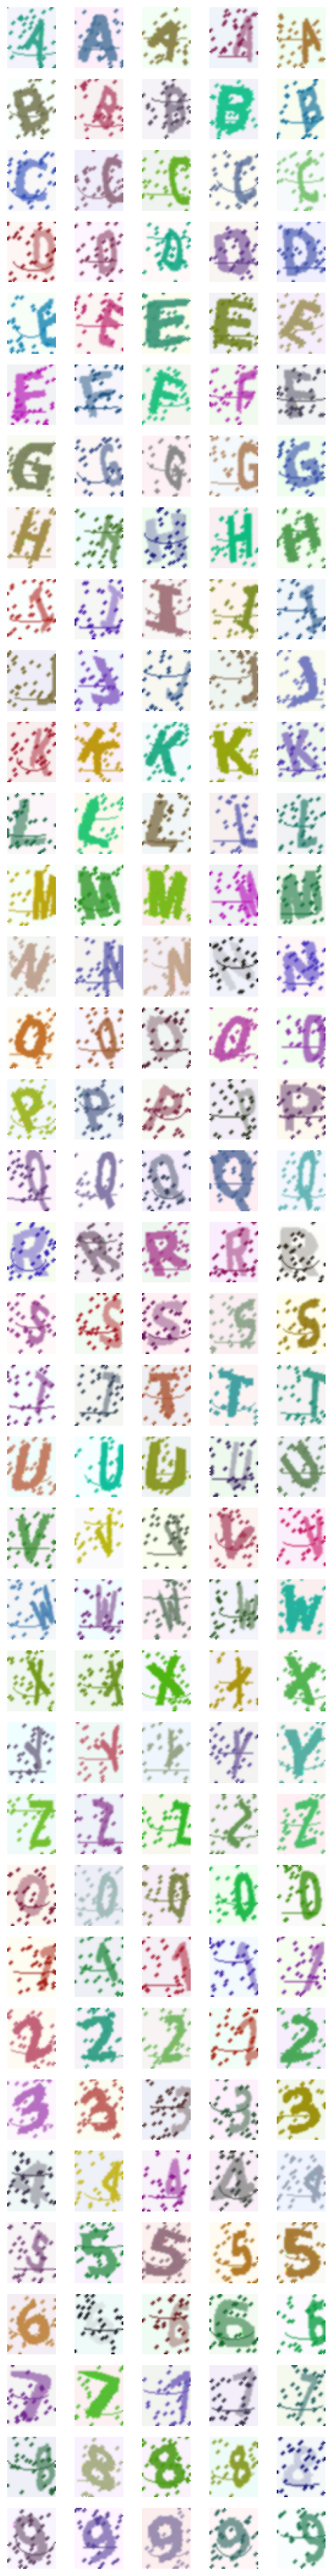

In [102]:
import os
import string
import numpy as np
import matplotlib.pyplot as plt
from captcha.image import ImageCaptcha

characters = string.ascii_uppercase + string.digits #string.ascii_letters includes lowercase
samples = 5
image_width = 40
image_height = 50
output_dir = 'captcha_letters'

os.makedirs(output_dir, exist_ok=True)

for char in characters:
    for i in range(samples):
        # Generate a CAPTCHA of a single value (A-Z, a-z, 0-9)
        captcha_text = char
        captcha = ImageCaptcha(width=image_width, height=image_height, font_sizes=(34,))
        captcha_image = captcha.generate_image(captcha_text)

        # Convert CAPTCHA to black & white
        #captcha_image = captcha_image.convert('L')

        # Save CAPTCHA as PNG
        #letter_case = 'upper' if char.isupper() else ('lower' if char.islower() else '') 
        #underscore = '_' if letter_case else ''
        #filename = os.path.join(output_dir, f'{letter_case}{underscore}{char}_{i}.png')
        filename = os.path.join(output_dir, f'{char}_{i}.png')
        captcha_image.save(filename)

# Plot
fig, axs = plt.subplots(len(characters), samples, figsize=(samples, len(characters)))

for i, char in enumerate(characters):
    for j in range(samples):
        #letter_case = 'upper' if char.isupper() else ('lower' if char.islower() else '')
        #underscore = '_' if letter_case else ''
        #image_path = os.path.join(output_dir, f'{letter_case}{underscore}{char}_{j}.png')
        image_path = os.path.join(output_dir, f'{char}_{j}.png')
        image = plt.imread(image_path)
        axs[i, j].imshow(image, cmap='gray')
        axs[i, j].axis('off')
        
plt.tight_layout()
plt.show()